## Training a simple neural network in Numpy

### Build the ReLU activation function

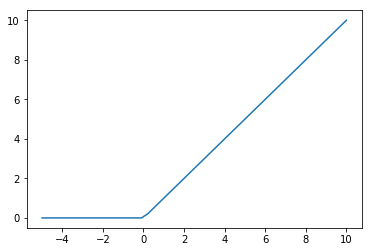

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def relu(x):
    return np.maximum(x, 0)
    
x = np.linspace(-5, 10)
plt.plot(x, relu(x))

### Define the basic parameters

In [2]:
batch_size = 128
input_dim = 1000
hidden_dim = 100
output_dim = 1

### Create random input and target values

In [3]:
input_values = np.random.randn(batch_size, input_dim)
output_values = np.random.randn(batch_size, output_dim)

### Create random weights for the network

In [4]:
weights1 = np.random.randn(input_dim, hidden_dim)
weights2 = np.random.randn(hidden_dim, output_dim)

### Check out the random performance before training

In [5]:
layer1_activations = input_values.dot(weights1)
layer1_relu = relu(layer1_activations)
predictions = layer1_relu.dot(weights2)

print(predictions[:5] - output_values[:5])

[[ 231.08799048]
 [-184.72097336]
 [-177.72242427]
 [ 201.43606741]
 [ 215.93764616]]


### Train the network

In [6]:
num_loops = 1000
learning_rate = 1e-6
for i in range(num_loops):
    activations = input_values.dot(weights1)
    relu_activations = relu(activations)
    predictions = relu_activations.dot(weights2)
    
    loss = np.sum(np.square(predictions - output_values))
    if ((i <= 100) & (i % 10 == 0) | (i % 100 == 0)):
        print(i, loss)
    
    # Gradients
    dloss_predictions = 2.0 * (predictions - output_values) 
    dloss_weights2 = relu_activations.T.dot(dloss_predictions)
    dloss_relu_activations = dloss_predictions.dot(weights2.T)
    dloss_activations = dloss_relu_activations.copy()
    dloss_activations[activations < 0] = 0
    dloss_weights1 = input_values.T.dot(dloss_activations)
    
    # Gradient Descent
    weights1 -= learning_rate * dloss_weights1
    weights2 -= learning_rate * dloss_weights2

(0, 5286828.3332003262)
(10, 844841.21427552146)
(20, 167050.57653580175)
(30, 60925.106882812928)
(40, 27176.865477645813)
(50, 13590.892312243095)
(60, 7209.3860289853483)
(70, 3992.4183591390611)
(80, 2294.8816974557171)
(90, 1364.4740468781806)
(100, 839.14371595411706)
(200, 76.276268848792199)
(300, 69.705903864818367)
(400, 69.62503632468119)
(500, 69.62361225261003)
(600, 69.623581190689265)
(700, 69.62358039218168)
(800, 69.623580369708691)
(900, 69.623580369048938)


### Checkout the performance after training

In [7]:
layer1_activations = input_values.dot(weights1)
layer1_relu = relu(layer1_activations)
predictions = layer1_relu.dot(weights2)

print(predictions[:5] - output_values[:5])

[[ -6.09074542e-01]
 [ -5.29990257e-01]
 [ -7.18314297e-14]
 [ -4.27324842e-13]
 [ -7.84308131e-01]]


The difference is now very close to 0, so I am satisfied for now.